In [1]:
#
# libraries
# 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression as OLS
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# 
# allow multiple I/O items per cell w/out print() etc.
#
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#
# load the metal alloy dataset
#
metal_data = pd.read_csv('datasets/metal_alloy.csv')
metal_data.head(10)

,metal_1,metal_2,alloy_hardness
0,0.958000,0.140659,1.254157
1,0.920147,0.107089,0.956846
2,0.590646,0.483316,1.952517
3,0.787427,0.239446,1.636522
4,0.223974,0.817454,2.367797
5,0.339729,0.694622,2.115060
6,0.242666,0.837370,2.899579
7,0.721072,0.365196,1.758518
8,0.666492,0.430698,1.591216
9,0.650387,0.414661,1.780010


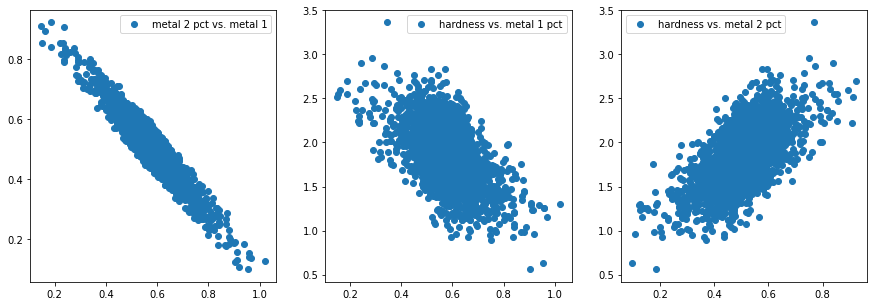

In [4]:
#
# visualize the data pairs
#
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].scatter(metal_data['metal_1'], 
              metal_data['metal_2'], 
              label = 'metal 2 pct vs. metal 1')
ax[0].legend()
ax[1].scatter(metal_data['metal_1'], 
              metal_data['alloy_hardness'], 
              label = 'hardness vs. metal 1 pct')
ax[1].legend()
ax[2].scatter(metal_data['metal_2'], 
              metal_data['alloy_hardness'], 
              label = 'hardness vs. metal 2 pct')
ax[2].legend()
plt.show()
#

In [5]:
#
# get the correlation between metal_1 and metal_2
#
correlation = metal_data['metal_1'].corr(metal_data['metal_2'])
print('correlation between metal 1 and metal 2: ', correlation)

correlation between metal 1 and metal 2:  -0.9335045017430936


In [6]:
#
# build linear model using statsmodels
#
X = sm.add_constant(metal_data.loc[:, ['metal_1', 'metal_2']])
lin_model = sm.OLS(metal_data['alloy_hardness'], X)
my_model = lin_model.fit()
print(my_model.summary())
print(my_model.params)

                            OLS Regression Results                            
Dep. Variable:         alloy_hardness   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     929.6
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          1.23e-311
Time:                        15:53:53   Log-Likelihood:                -44.409
No. Observations:                2858   AIC:                             94.82
Df Residuals:                    2855   BIC:                             112.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3434      0.147     -2.339      0.0

In [7]:
#
# generate a dataset with some variables highly correlated
#
np.random.seed(42)
multi_coll_data = pd.DataFrame({'x1' : range(1000)})
for i in range(9):
    multi_coll_data['x' + str(i + 2)] = np.add(list(range(1000)), 
                                               np.random.uniform(-50, 50, 1000))
for i in range(0, 9, 2):
    multi_coll_data['x' + str(i + 2)] = np.add(multi_coll_data['x' + str(i + 2)],
                                               10 * np.random.uniform(0, 1) * 
                                               np.random.normal(-100, 100, 1000))
multi_coll_data['y'] = range(1000)
print(multi_coll_data.head())
print(multi_coll_data.tail())

   x1           x2         x3          x4         x5           x6         x7  \
0   0   690.303674 -31.486707 -731.643758  17.270299  1436.411756 -10.636448   
1   1  -685.241074   5.190095 -458.895861  30.668140  -716.580334  -1.656434   
2   2   936.292932  39.294584 -712.144359 -22.953210  -122.183985  37.454739   
3   3 -1798.095409  26.222489 -269.751619  15.487410  -464.936948 -12.999561   
4   4 -2114.215496  34.656115 -480.576137  11.174598  -768.245414  40.964968   

            x8         x9         x10  y  
0  -492.026404 -46.120055   22.754113  0  
1 -3610.645334 -30.322747 -472.866262  1  
2  -762.459068  35.124581 -170.442837  2  
3 -2052.517125  29.676836 -758.140719  3  
4  -679.874801 -10.935731  -69.331760  4  
      x1           x2           x3           x4           x5           x6  \
995  995  -298.409060  1010.695516   814.386703   989.210703   782.825485   
996  996  -286.163537  1041.661462  1279.540113   979.440118 -1432.060863   
997  997  1018.026789   953.89

<AxesSubplot:xlabel='x1'>

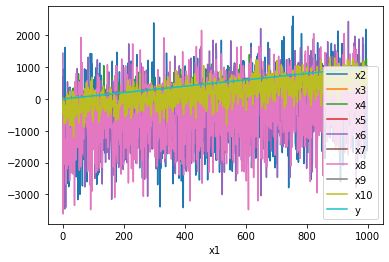

In [8]:
#
# look at the vairables vs. x1
#
multi_coll_data.plot(x = 'x1')

           x1        x2        x3        x4        x5        x6        x7  \
x1   1.000000  0.266856  0.994889  0.611331  0.995113  0.306932  0.995042   
x2   0.266856  1.000000  0.264142  0.169975  0.263578  0.075348  0.264059   
x3   0.994889  0.264142  1.000000  0.611296  0.989968  0.311761  0.990264   
x4   0.611331  0.169975  0.611296  1.000000  0.609648  0.182316  0.607259   
x5   0.995113  0.263578  0.989968  0.609648  1.000000  0.308579  0.990572   
x6   0.306932  0.075348  0.311761  0.182316  0.308579  1.000000  0.299192   
x7   0.995042  0.264059  0.990264  0.607259  0.990572  0.299192  1.000000   
x8   0.288650  0.036450  0.289213  0.169180  0.284054  0.097116  0.284244   
x9   0.995146  0.268714  0.990546  0.613279  0.990060  0.304865  0.990337   
x10  0.692803  0.204684  0.690445  0.431725  0.693054  0.222346  0.688736   

           x8        x9       x10  
x1   0.288650  0.995146  0.692803  
x2   0.036450  0.268714  0.204684  
x3   0.289213  0.990546  0.690445  
x4   0.1

<Figure size 792x792 with 0 Axes>

<AxesSubplot:>

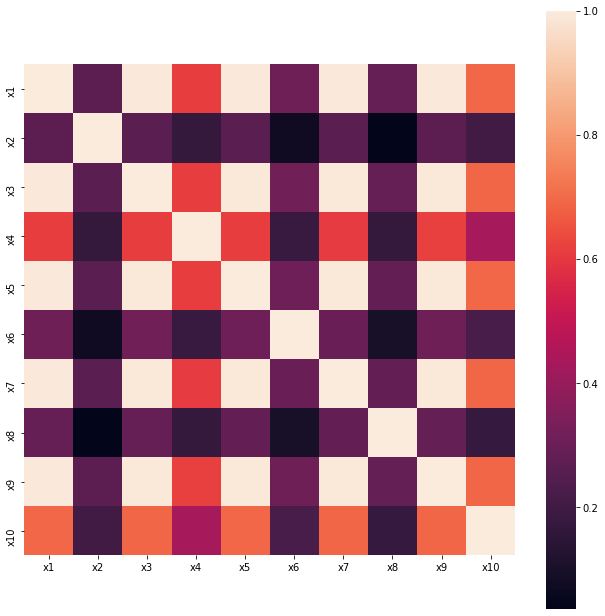

In [9]:
#
# compute correlations then visualize as a heatmap
#
corr = multi_coll_data.drop(columns = ['y']).corr()
print(corr)
import seaborn as sns
plt.figure(figsize = (11, 11))
sns.heatmap(corr, square = True)

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

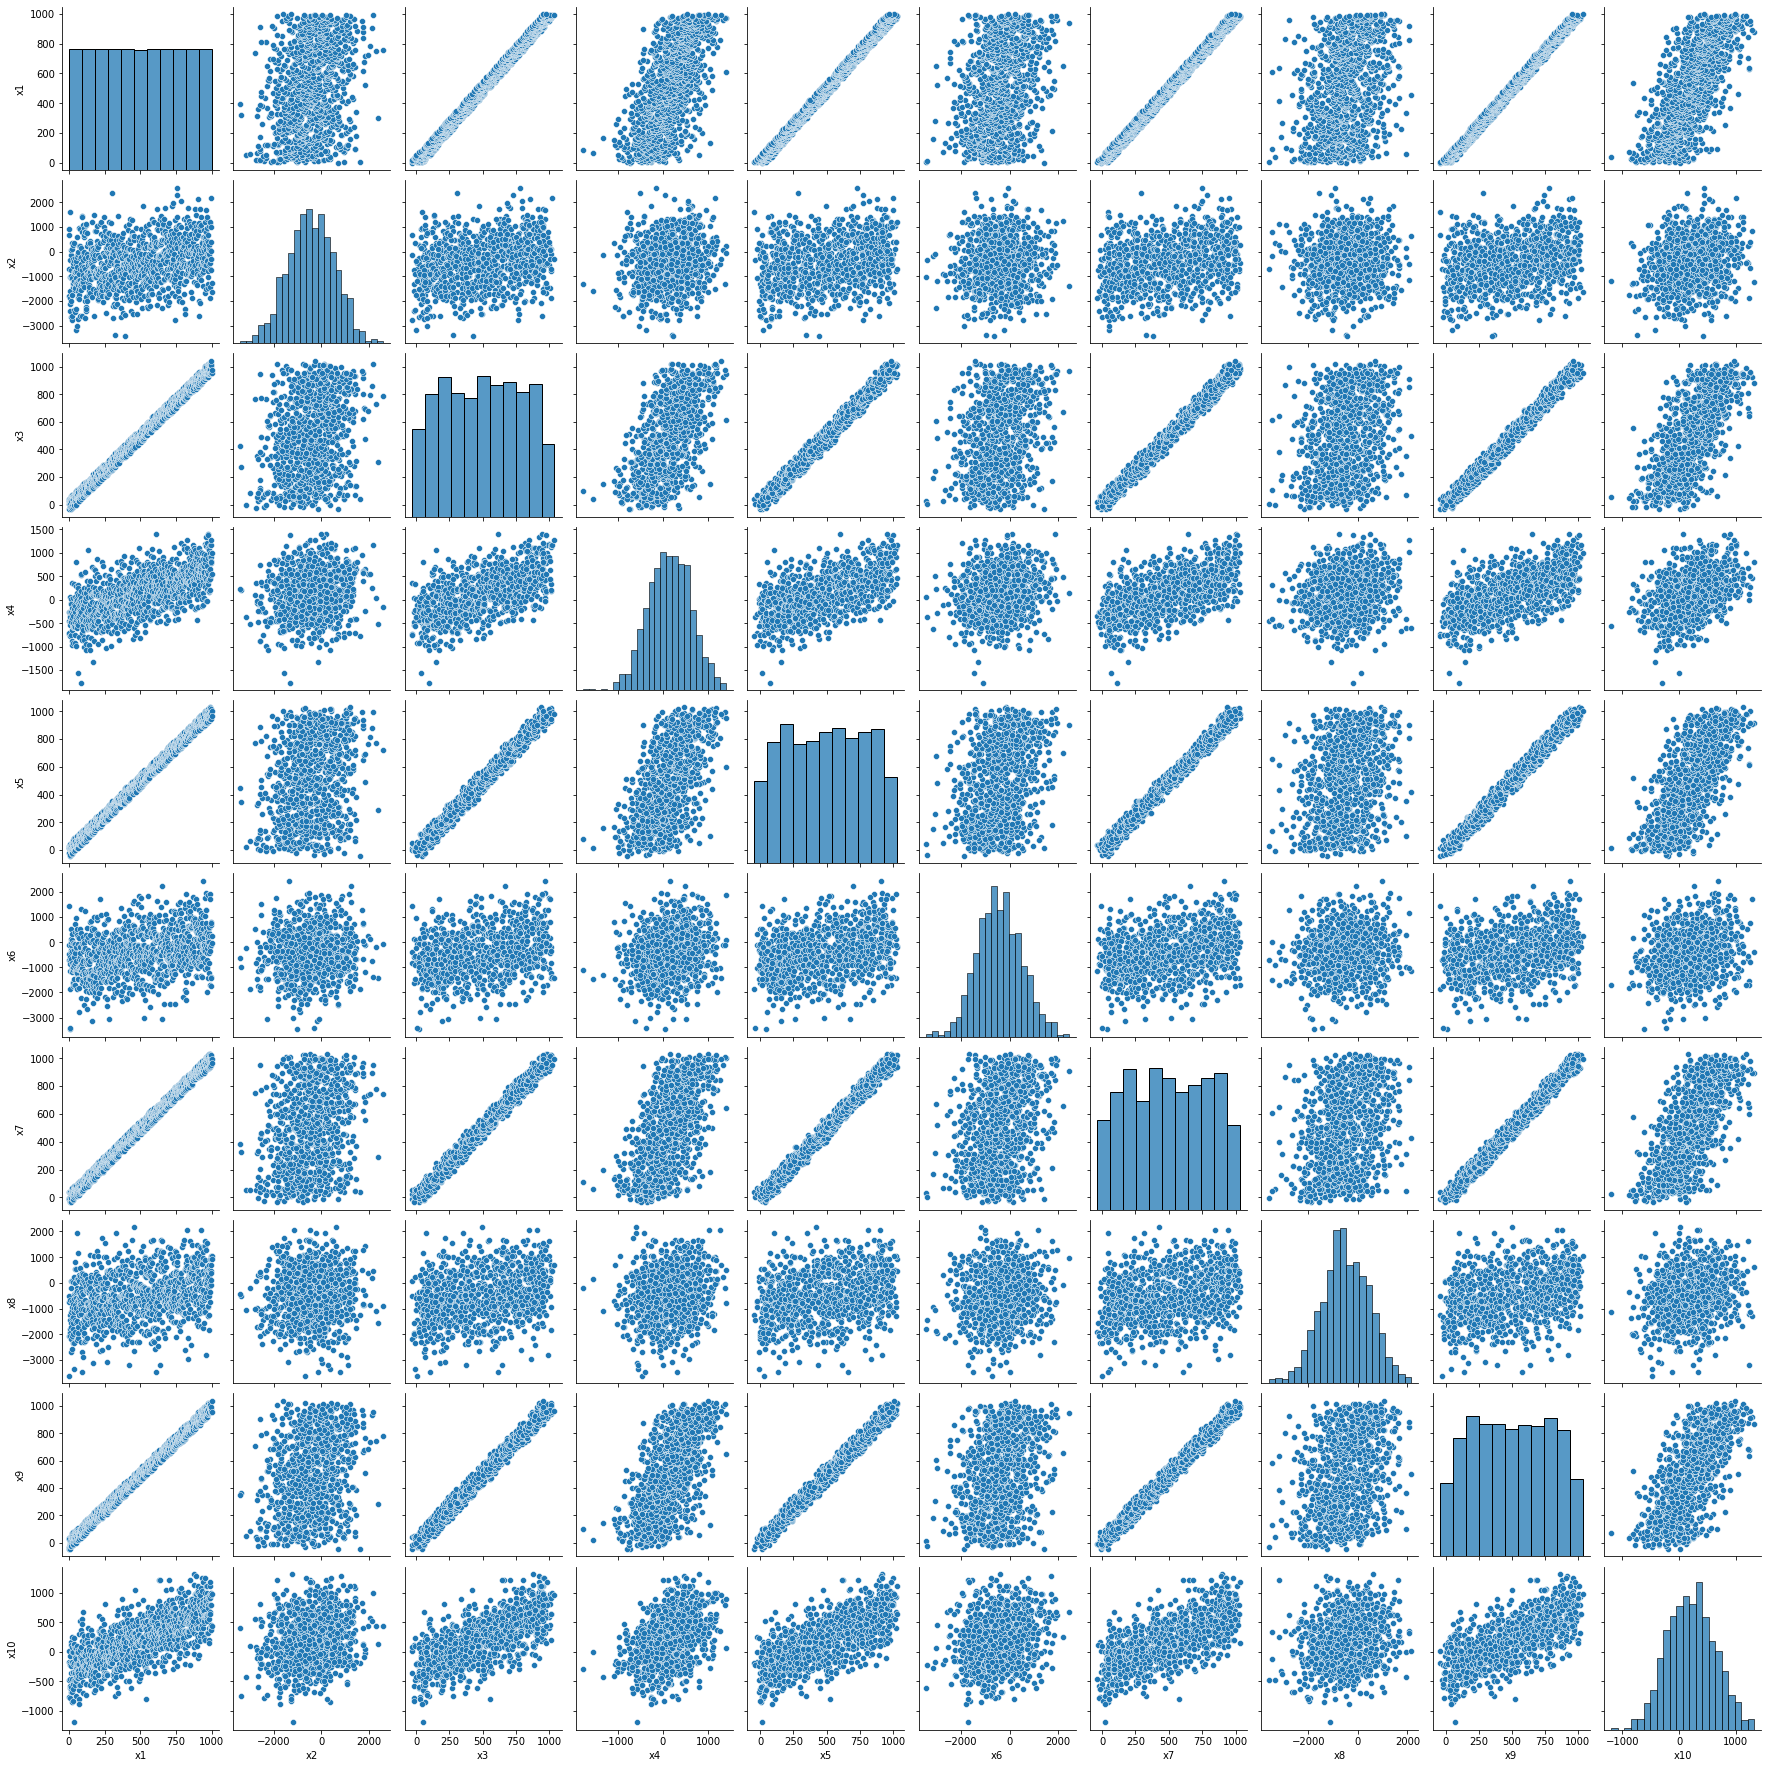

In [10]:
#
# use seaborn to make a pairplot
#
plt.figure(figsize = (11, 11))
sns.pairplot(multi_coll_data.drop(columns = ['y']))

In [11]:
#
# read the car miles per gallon data set
#
my_data = pd.read_csv('datasets/auto-mpg.data.csv')
my_data.head()

,mpg,cyl,disp,hp,weight,accel,my,name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [12]:
#
# make a utility function to plot histograms per-variable on a grid
#
def plot_histogram_grid(df, variables, n_rows, n_cols, bins):
    fig = plt.figure(figsize = (11, 11))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
#
# for some variables there are relatively few unique values, so we'll
# adjust the histogram appearance accordingly to avoid "gaps" in the plots
#    
        if len(np.unique(df[var_name])) <= bins:
          use_bins = len(np.unique(df[var_name]))
        else:
          use_bins = bins
#      
        df[var_name].hist(bins = use_bins, ax = ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

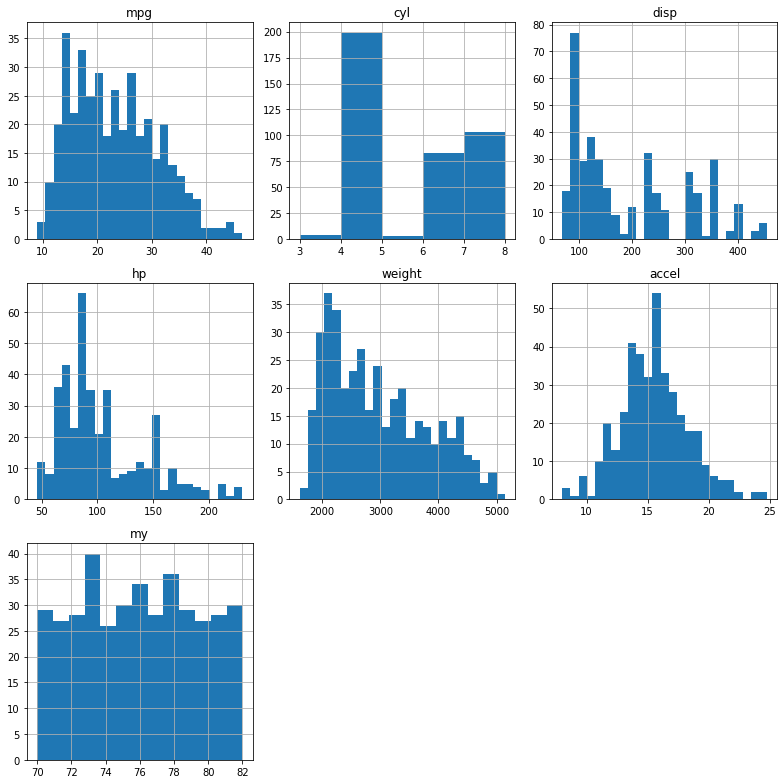

In [13]:
#
# look at the variable distributions on a grid
#
plot_histogram_grid(my_data, variables = list(my_data.columns)[:-1], 
                    n_rows = 3, n_cols = 3, bins = 25)

In [14]:
#
# make a utility function to plot pair-wise scatter plots on a grid
#
def plot_corr_grid(df, variables):
    n_cols = len(variables) - 1
    n_rows = n_cols
    fig = plt.figure(figsize = (18, 16))
    for i in range(n_rows):
        for j in range(i):
            ax = fig.add_subplot(n_rows, n_cols, (i) * n_cols + j + 1) 
            df.plot.scatter(ax = ax, x = variables[i], y = variables[j])
            ax.set_title(variables[i] + ' vs. ' + variables[j])
    fig.tight_layout()
    plt.show()

c:\users\bbate\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():


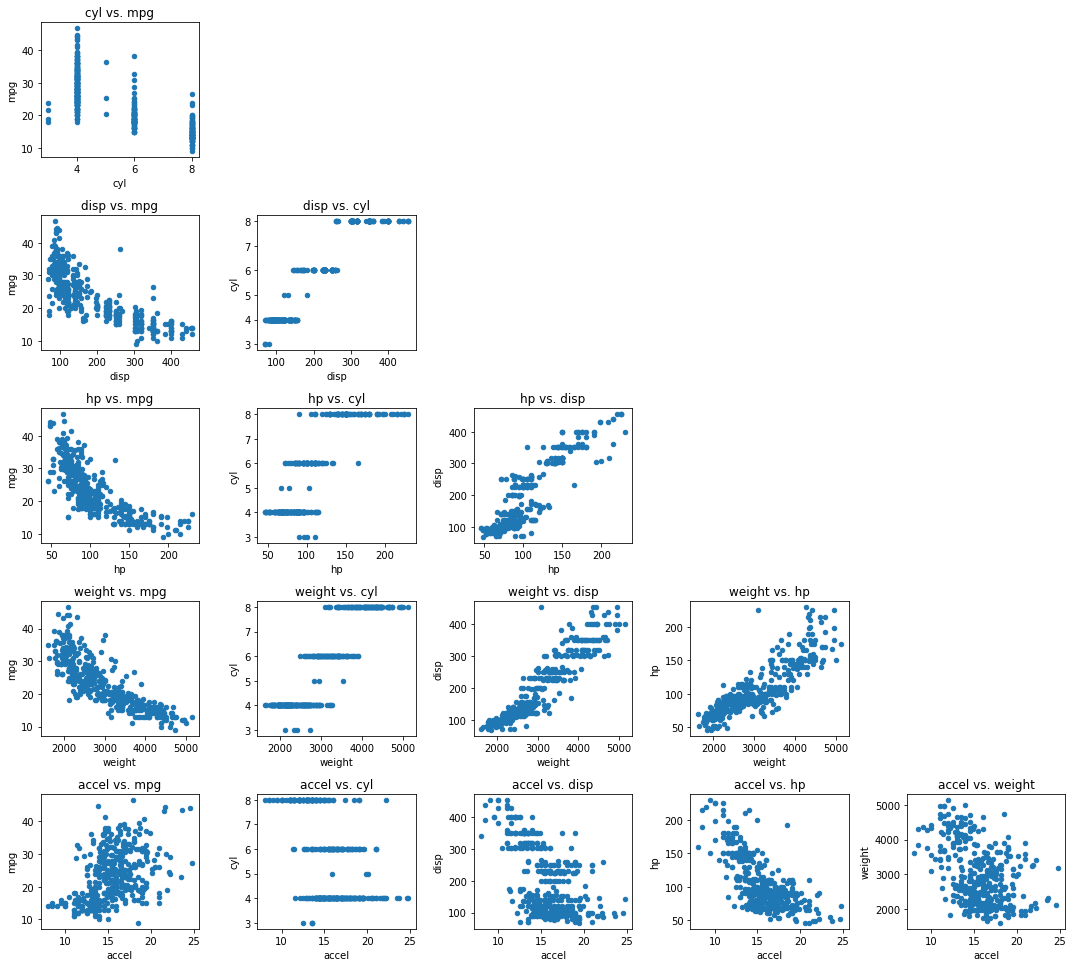

In [15]:
#
# look at the pair-wise correlations on scatter plots
#
plot_corr_grid(my_data, variables = list(my_data.columns)[:-1])

In [16]:
#
# split the data 0.7 / 0.3
#
np.random.seed(42)
train = np.random.choice(my_data.shape[0], int(0.7 * my_data.shape[0]))
validation = [i for i in range(my_data.shape[0]) if i not in train]
X_train = my_data.iloc[train, :].drop(columns = ['name', 'mpg'])
y_train = np.reshape(np.array(my_data.loc[train, 'mpg']), (-1, 1))

In [17]:
#
# make a linear regression model using sklearn
#
lin_model = OLS()
my_model = lin_model.fit(X_train, y_train)
print('R2 score is ', my_model.score(X_train, y_train))
print('model coefficients:\n', my_model.coef_, '\nintercept: ', my_model.intercept_)

R2 score is  0.831869958782409
model coefficients:
 [[-3.53519873e-01 -4.91464180e-04 -1.15484755e-02 -6.08231188e-03
   2.60263994e-02  6.81342318e-01]] 
intercept:  [-7.066461]


In [18]:
#
# get the RMSE for the fit
#
RMSE = mean_squared_error(y_train, my_model.predict(X_train), squared = False)
print('the root mean square error is ', RMSE)

the root mean square error is  3.2361376539382123


In [19]:
#
# get the model RMSE on the validation data
#
X_val = my_data.iloc[validation, :].drop(columns = ['name', 'mpg'])
y_val = my_data.loc[validation, 'mpg']
val_pred = my_model.predict(X_val)
val_RMSE = mean_squared_error(y_val, val_pred, squared = False)
print('the validation RMSE is ', val_RMSE)

the validation RMSE is  3.530822072558969


<AxesSubplot:title={'center':'training'}, ylabel='Frequency'>

Text(0.5, 0, 'model year')

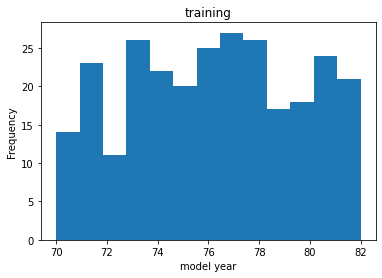

<AxesSubplot:title={'center':'validation'}, ylabel='Frequency'>

Text(0.5, 0, 'model_year')

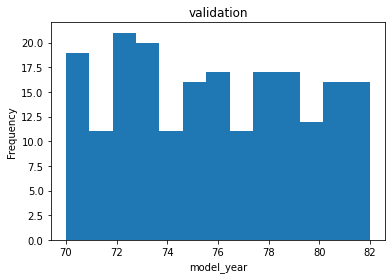

In [20]:
#
# compare the model years for the train and val data
#
X_train.my.plot(kind = 'hist', bins = 13, title = 'training')
plt.xlabel('model year')
plt.show()
X_val.my.plot(kind = 'hist', bins = 13, title = 'validation')
plt.xlabel('model_year')
plt.show()

In [21]:
#
# look at coefficients from regression model
#
print('var\t  coef\t\t\t    range')
for coef, var in enumerate(my_data.columns[1:-1]):
    print(var, '\t', round(my_model.coef_[0][coef], 5), 
          '\twith range ', round(float(my_data[var].max() - 
                                       my_data[var].min()), 2))

var	  coef			    range
cyl 	 -0.35352 	with range  5.0
disp 	 -0.00049 	with range  387.0
hp 	 -0.01155 	with range  184.0
weight 	 -0.00608 	with range  3527.0
accel 	 0.02603 	with range  16.8
my 	 0.68134 	with range  12.0


In [22]:
#
# scale X by hand
#
scales = dict()
X = my_data.iloc[train, 1:-1]
for col in my_data.columns[1:-1]:
    my_min = X[col].min()
    my_max = X[col].max()
    my_range = my_max - my_min
    scales.update({col : dict({'Xmin' : my_min,
                               'Xmax' : my_max,
                               'Xrange' : my_range})})
    X[col] = (my_data[col] - my_min) / my_range
scales = pd.DataFrame.from_dict(scales).T
print(scales)
X.describe().T

          Xmin    Xmax  Xrange
cyl        3.0     8.0     5.0
disp      71.0   455.0   384.0
hp        48.0   230.0   182.0
weight  1613.0  5140.0  3527.0
accel      9.5    23.7    14.2
my        70.0    82.0    12.0


,count,mean,std,min,25%,50%,75%,max
cyl,274.0,0.494161,0.329783,0.0,0.200000,0.300000,0.600000,1.0
disp,274.0,0.318041,0.260051,0.0,0.088542,0.208333,0.486979,1.0
hp,274.0,0.298187,0.196083,0.0,0.148352,0.258242,0.340659,1.0
weight,274.0,0.384055,0.237395,0.0,0.182733,0.339665,0.575631,1.0
accel,274.0,0.440552,0.183957,0.0,0.316901,0.443662,0.563380,1.0
my,274.0,0.519161,0.298829,0.0,0.250000,0.500000,0.750000,1.0


In [23]:
#
# use MinMaxScaler to scale X
#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = my_data.iloc[train, 1:-1]
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = my_data.columns[1:-1]
X_scaled.describe().T

MinMaxScaler()

,count,mean,std,min,25%,50%,75%,max
cyl,274.0,0.494161,0.329783,0.0,0.200000,0.300000,0.600000,1.0
disp,274.0,0.318041,0.260051,0.0,0.088542,0.208333,0.486979,1.0
hp,274.0,0.298187,0.196083,0.0,0.148352,0.258242,0.340659,1.0
weight,274.0,0.384055,0.237395,0.0,0.182733,0.339665,0.575631,1.0
accel,274.0,0.440552,0.183957,0.0,0.316901,0.443662,0.563380,1.0
my,274.0,0.519161,0.298829,0.0,0.250000,0.500000,0.750000,1.0


In [24]:
#
# look at the values used by this scaler
#
print(scaler.data_range_)
print(scaler.data_min_)

[   5.   384.   182.  3527.    14.2   12. ]
[   3.    71.    48.  1613.     9.5   70. ]


In [25]:
#
# linear regression with scaled X
#
lin_model = OLS()
y = np.reshape(np.array(my_data.loc[train, 'mpg']), (-1, 1))
my_model = lin_model.fit(X_scaled, y)
print('var\t  coef\t\t\t    range')
for coef, var in enumerate(my_data.columns[1:-1]):
    print(var, '\t', round(my_model.coef_[0][coef], 5), 
          '\twith range ', round(float(X_scaled[var].max() - 
                                       X_scaled[var].min()), 2))

var	  coef			    range
cyl 	 -1.7676 	with range  1.0
disp 	 -0.18872 	with range  1.0
hp 	 -2.10182 	with range  1.0
weight 	 -21.45231 	with range  1.0
accel 	 0.36957 	with range  1.0
my 	 8.17611 	with range  1.0


In [26]:
#
# compare score to unscaled model
#
my_model.score(X_scaled, y)

0.8318699587824089

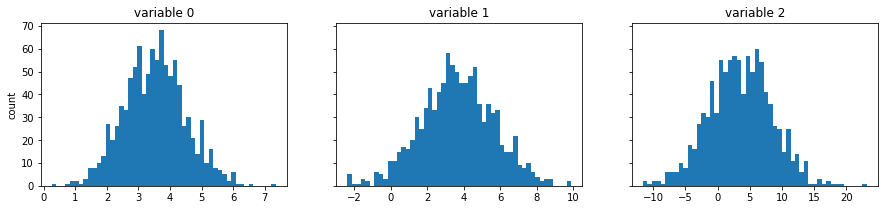

In [27]:
#
# load some sample distributions
#
distributions = pd.read_csv('datasets/distributions.csv')
#
#  compare the histograms
#
fig, ax = plt.subplots(1, distributions.shape[1], 
                       figsize = (15, 3), 
                       sharey = True)
for i in range(distributions.shape[1]):
    _ = ax[i].hist(distributions.iloc[:, i], bins = 50)
    _ = ax[i].set_title('variable ' + str(i))
_ = ax[0].set_ylabel('count')
plt.show()

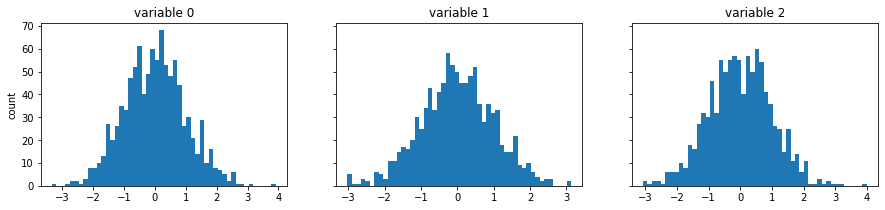

In [28]:
#
# scale the three distributions with StandardScaler
#
scaler = StandardScaler()
colnames = distributions.columns
distributions = pd.DataFrame(scaler.fit_transform(distributions))
distributions.columns = colnames
#
# plot again
#
fig, ax = plt.subplots(1, distributions.shape[1], 
                       figsize = (15, 3), 
                       sharey = True)
for i in range(distributions.shape[1]):
    _ = ax[i].hist(distributions.iloc[:, i], bins = 50)
    _ = ax[i].set_title('variable ' + str(i))
_ = ax[0].set_ylabel('count')
plt.show()

In [29]:
#
# look at the scaled data description
#
pd.set_option('display.float_format', lambda x: '%.2f' % x)
distributions.describe().T

,count,mean,std,min,25%,50%,75%,max
values_1,1000.00,-0.00,1.00,-3.33,-0.68,0.01,0.64,3.92
values_2,1000.00,-0.00,1.00,-3.02,-0.68,-0.01,0.66,3.13
values_3,1000.00,0.00,1.00,-3.08,-0.67,-0.01,0.67,3.99


In [30]:
#
# reload the mpg data
#
my_data = pd.read_csv('datasets/auto-mpg.data.csv')
#
# scale with StandardScaler
#
from sklearn.preprocessing import StandardScaler
X = my_data.iloc[train, :].drop(columns = ['name', 'mpg'])
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = my_data.columns[1:-1]
X_scaled.describe().T

StandardScaler()

,count,mean,std,min,25%,50%,75%,max
cyl,274.00,0.00,1.00,-1.50,-0.89,-0.59,0.32,1.54
disp,274.00,0.00,1.00,-1.23,-0.88,-0.42,0.65,2.63
hp,274.00,-0.00,1.00,-1.52,-0.77,-0.20,0.22,3.59
weight,274.00,0.00,1.00,-1.62,-0.85,-0.19,0.81,2.60
accel,274.00,-0.00,1.00,-2.40,-0.67,0.02,0.67,3.05
my,274.00,0.00,1.00,-1.74,-0.90,-0.06,0.77,1.61


In [31]:
y = np.reshape(np.array(my_data.loc[train, 'mpg']), (-1, 1))
lin_model = OLS()
my_model = lin_model.fit(X_scaled, y)
print('R2 score is ', my_model.score(X_scaled, y))
print('model coefficients:\n', my_model.coef_, '\nintercept: ', my_model.intercept_)
RMSE = mean_squared_error(y, my_model.predict(X_scaled), squared = False)
print('the root mean square error is ', RMSE)

R2 score is  0.831869958782409
model coefficients:
 [[-0.58185994 -0.0489877  -0.41137864 -5.08336838  0.06786155  2.438796  ]] 
intercept:  [24.02262774]
the root mean square error is  3.2361376539382127


In [32]:
X = scaler.inverse_transform(X_scaled)
X = pd.DataFrame(X)
X.columns = my_data.columns[1:-1]
X.head()

,cyl,disp,hp,weight,accel,my
0,8.00,400.00,150.00,4997.00,14.00,73.00
1,4.00,98.00,65.00,2380.00,20.70,81.00
2,4.00,151.00,85.00,2855.00,17.60,78.00
3,6.00,232.00,100.00,2789.00,15.00,73.00
4,8.00,304.00,150.00,3892.00,12.50,72.00
